#### In this notebook we will explore what exactly goes into pricing a diamond and how much each aspect affects the price.

    Question 1: Does a certain shape of diamond cost more than another?
    Question 2: How much do the 4 C's affect the price of a diamond?
    Question 3: Is it possible to know if we're getting a good price?

The 4 C's — Carat (Weight), Cut, Clarity, and Color — are universally accepted standards for assessing the quality and value of a diamond. Here's how each factor generally affects the diamond's price:

1. **Carat (Weight)**: This is often considered the most influential factor because larger diamonds are rarer and therefore more valuable. Price increases exponentially with carat weight. For example, a 2-carat diamond will typically cost more than twice as much as a 1-carat diamond of similar quality.

2. **Cut**: This refers to how well a diamond has been cut and directly affects its brilliance and sparkle. A well-cut diamond will reflect light better, making it appear more brilliant and thus more valuable. Cuts are graded from poor to excellent. Poorly cut diamonds can be less expensive, as they don't have the same luster or fire as better-cut diamonds.

3. **Clarity**: Clarity grades assess how many blemishes or inclusions and their size, nature, and position. Diamonds with fewer inclusions are rarer and more valuable. Clarity is graded from Included (I1, I2, I3) to Flawless (FL). While high-clarity diamonds are pricier, many inclusions are microscopic and do not affect a diamond's appearance to the naked eye.

4. **Color**: Most diamonds range from colorless to light yellow. The less color a diamond exhibits, the higher the grade and the price, particularly for diamonds that are completely colorless (D-grade). Once a diamond reaches a certain level of color (typically around the K-L-M range), it can become less expensive, although diamonds with distinct colors (such as pink or blue) can be far more valuable.

The dataset contains the following columns:

- `Product_id`: A unique identifier for each diamond.
- `Shape`: The shape of the diamond (e.g., Emerald, Pear, Cushion, Princess).
- `Carat`: The weight of the diamond.
- `Clarity`: A measurement of how clear the diamond is.
- `Colour`: The color grade of the diamond.
- `Cut`: The quality of the cut of the diamond.
- `Polish`: The finish of the diamond's surface.
- `Symmetry`: The alignment of the diamond's facets.
- `Fluorescence`: The diamond's reaction to ultraviolet light.
- `Price`: The price of the diamond.
- `Product_url`: A URL for the product.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
# List of file names
files = ['data_cushion.csv', 'data_round.csv', 'data_heart.csv', 'data_emerald.csv', 'data_oval.csv',
         'data_marquise.csv', 'data_pear.csv', 'data_princess.csv']

dfs = []

#Read each file and appends its dataframe to the list
for file in files:
    df = pd.read_csv(file)
    dfs.append(df)

#Concatenate all dfs into a single dataframe
df = pd.concat(dfs, ignore_index=True)

In [4]:
df.to_csv('all_data.csv')

In [14]:
# Basic dataset information
shape = df.shape
dtypes = df.dtypes

# Summary statistics for numerical columns
summary_statistics = df.describe()

# Unique values count for categorical columns
unique_values = df.nunique()

# Check for missing values
missing_values = df.isnull().sum()

# Filter out columns without missing values
missing_values = missing_values[missing_values > 0]

{
    "shape": shape,
    "dtypes": dtypes,
    "summary_statistics": summary_statistics,
    "unique_values": unique_values,
    "missing_values": missing_values
}


{'shape': (21480, 13),
 'dtypes': Product_id       object
 Shape            object
 Carat           float64
 Clarity          object
 Colour           object
 Cut              object
 Polish           object
 Symmetry         object
 Fluorescence     object
 Measurements     object
 Lab              object
 Price            object
 Product_url      object
 dtype: object,
 'summary_statistics':               Carat
 count  21480.000000
 mean       0.673690
 std        0.187583
 min        0.500000
 25%        0.500000
 50%        0.700000
 75%        0.750000
 max        2.510000,
 'unique_values': Product_id      21435
 Shape              13
 Carat             106
 Clarity            10
 Colour             19
 Cut                 6
 Polish              3
 Symmetry            5
 Fluorescence        8
 Measurements     7705
 Lab                 3
 Price           16504
 Product_url     21435
 dtype: int64,
 'missing_values': Clarity            28
 Cut              1014
 Polish            

#### Dataset Overview

- **Shape**: The dataset has **21,480 rows** and **13 columns**.

- **Data Types**: 
  - Most columns are of type `object`.
  - `Carat` is of type `float64`.

- **Unique Values**:
  - **Shape**: 13 unique values
  - **Clarity**: 10 unique values
  - **Colour**: 19 unique values
  - **Cut**: 6 unique values

- **Missing Values** (NA):
  - **Clarity**: 28 missing values
  - **Cut**: 1,014 missing values
  - **Measurements**: 12,480 missing values (over half the dataset)
  - **Lab**: 12,480 missing values (over half the dataset)


#### Data Preparation

In [16]:
#Drop missing values
df.dropna(subset=['Clarity', 'Cut'], inplace=True)
df.shape

(20438, 13)

In [21]:
#Check for duplicates
duplicate_rows = df[df.duplicated()]
duplicate_rows.shape[0]

# Keep the first occurrence of each duplicated row
df.drop_duplicates(inplace=True)
df.shape

(20393, 13)

In [23]:
df.dtypes

Product_id       object
Shape            object
Carat           float64
Clarity          object
Colour           object
Cut              object
Polish           object
Symmetry         object
Fluorescence     object
Measurements     object
Lab              object
Price            object
Product_url      object
dtype: object

In [28]:
#Remove commas and dollar signs from Price column and convert to float
df['Price'] = df['Price'].replace('[\$,]', '',regex=True).astype(float)

#Convert Carat to numeric 
#df['Carat'] = pd.to_numeric(df['Carat'], errors='coerce')

# Ensure 'Cut' column is categorical
df['Cut'] = df['Cut'].astype('category')

#Convert all Shape values to uppercase as some vlaues are in different cases
df['Shape'] = df['Shape'].str.upper()


1 Shape


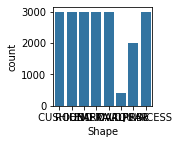

2 Clarity


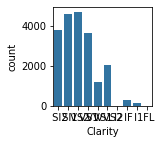

3 Colour


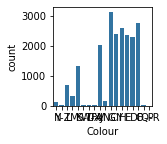

4 Cut


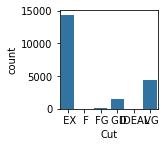

5 Polish


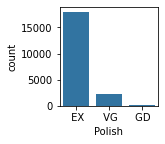

6 Symmetry


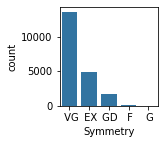

In [40]:
# Define the categorical features we want to visualize
categorical_features = ['Shape', 'Clarity', 'Colour', 'Cut', 'Polish', 'Symmetry']
for i, f in enumerate(categorical_features, start=1):
    print(i,f)
    plt.subplot(2,3, i)
    sns.countplot(x=f, data=df)
    ##sns.histplot(df[f])
    
    plt.show()

#### Exploratory Data Analysis

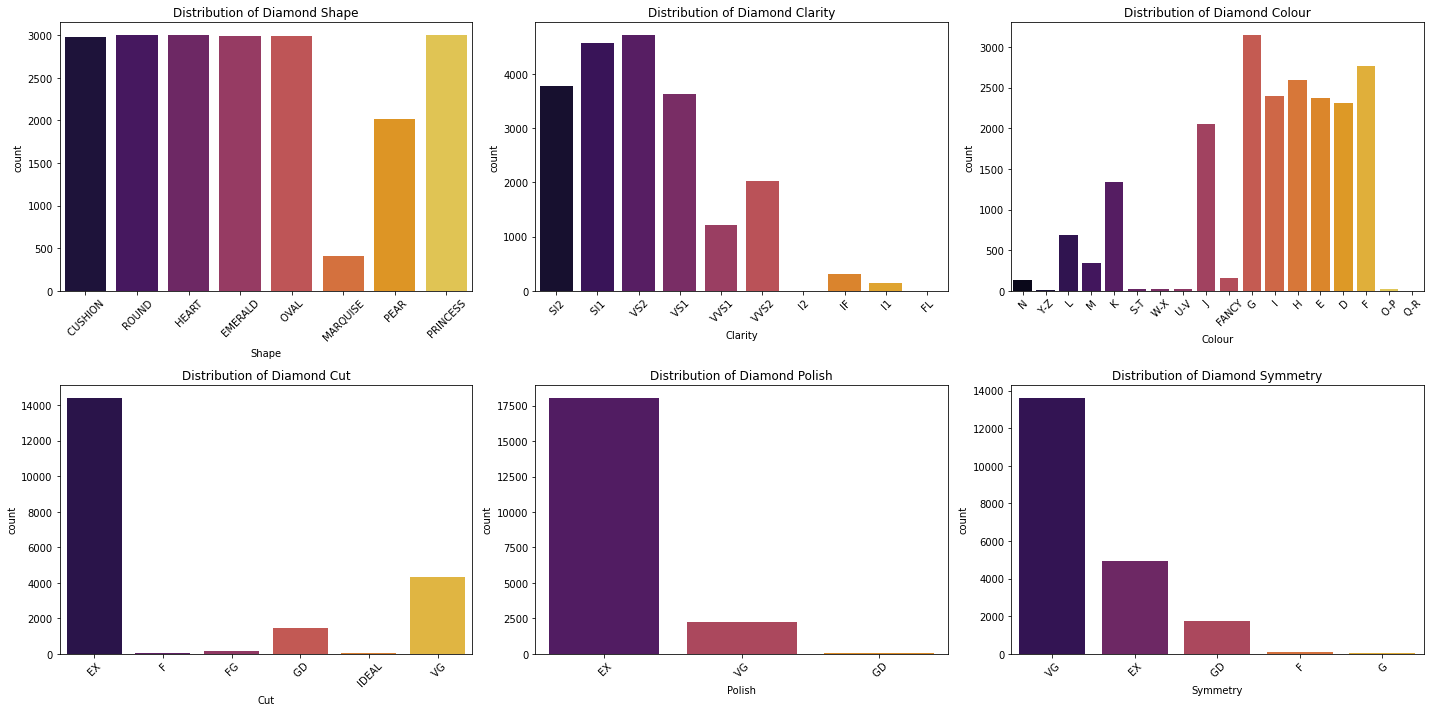

In [41]:

# Define the categorical features we want to visualize
categorical_features = ['Shape', 'Clarity', 'Colour', 'Cut', 'Polish', 'Symmetry']

# Set the figure size for the plots
plt.figure(figsize=(20, 10))

# Loop through the categorical features to create subplots
for index, feature in enumerate(categorical_features, start=1):
    plt.subplot(2, 3, index)
    sns.countplot(x=feature, data=df, hue=feature, palette='inferno')
    plt.title(f'Distribution of Diamond {feature}')
    plt.xticks(rotation=45)

# Adjust layout for better presentation
plt.tight_layout()

# Show the plots
plt.show()


**Insights:**
- **Shape Distribution**: The dataset contains fewer entries for marquise and pear shapes because their data was less available on the site from which the data was scraped. While most other shapes have around 3,000 entries, marquise has only 500, and pear has 2,000.
- **Clarity Grades**: There’s a wide range of clarity grades, with VS1, VS2, SI2, and SI1 being the most frequently occurring.
- **Colour Trends**: The dataset shows a preference for certain diamond colors, with G, H, and F being the most common.
- **Cut Quality**: Although the 'Cut' feature has many missing values, 'EX' (Excellent) stands out as the most frequent grade among the available data.
- **Polish and Symmetry**: The majority of diamonds are graded as 'EX' (Excellent) or 'VG' (Very Good) for both polish and symmetry, indicating a general preference for high-quality finishes.

### **Analysis for Question 1: Price by Diamond Shape**

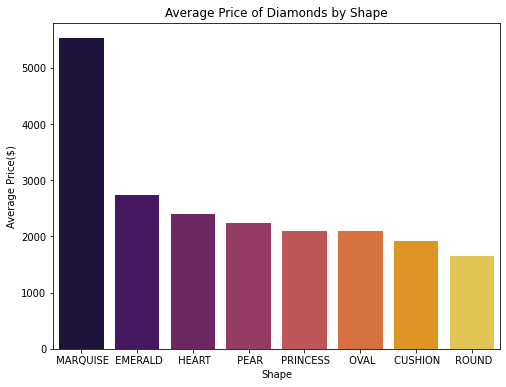

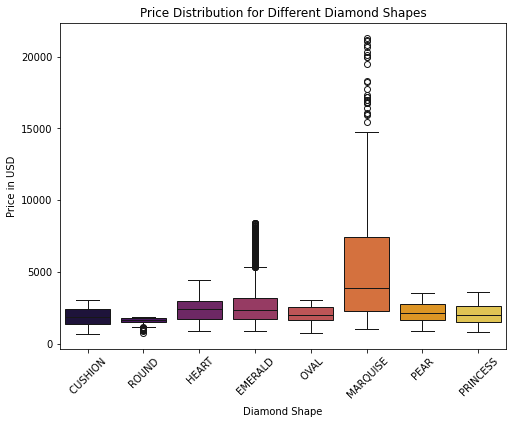

In [58]:
#Calculate avg price by shape
avg_price_by_shape = df.groupby('Shape')['Price'].mean().sort_values(ascending=False).reset_index()

#Barplot for avg price
plt.figure(figsize=(8, 6))
sns.barplot(x='Shape', y='Price', hue='Shape', data=avg_price_by_shape, palette='inferno', legend=False)
plt.title('Average Price of Diamonds by Shape')
plt.xlabel('Shape')
plt.ylabel('Average Price($)')
plt.show()

#Boxplot for price distribution
plt.figure(figsize=(8, 6))
boxplot = sns.boxplot(x='Shape', y='Price', palette='inferno', hue='Shape',data=df)
boxplot.set_title('Price Distribution for Different Diamond Shapes')
boxplot.set_xlabel('Diamond Shape')
boxplot.set_ylabel('Price in USD')
plt.xticks(rotation=45)  # Rotate the x labels to make them readable
plt.show()


**Insights from the Bar Plot**:
- Marquise-shaped diamonds have the highest average price at approximately $5,529.67, much more than other shapes.
- The average price drops for other shapes, with Round and Cushion diamonds being the least expensive.

**Insights from the Box Plot**:
- Marquise-shaped diamonds not only have a higher median price but also show a wide range of prices and many outliers. This means there’s a lot of variability in their pricing.
- Shapes like Emerald and Round have smaller price ranges, indicating more consistent prices.

**Summary of Analysis:**
- **Marquise diamonds**: Most expensive on average, but prices vary a lot.
- **Emerald and Heart shapes**: Have high average prices with less variability.
- **Round and Cushion shapes**: Among the least expensive, with Round being the cheapest on average at $957.68.
- The box plot shows that some shapes have consistent prices, while others, like Marquise, vary greatly. This suggests that other factors (like quality or size) might affect the price more for certain shapes.


### **Analysis for Question 2: Impact of the 4 C's on Diamond Price**

We'll proceed to analyze how the 4 C's (Carat, Clarity, Colour, and Cut) affect the price of a diamond. We'll start by examining the relationship between Carat and Price with a scatter plot, and then look at the average price for different categories of Clarity, Colour, and Cut.


/tmp/ipykernel_36144/2129885734.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cut', y='Price', data=df, palette='viridis')
/tmp/ipykernel_36144/2129885734.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Clarity', y='Price', data=df, palette='plasma')
/tmp/ipykernel_36144/2129885734.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Colour', y='Price', data=df, palette='inferno')


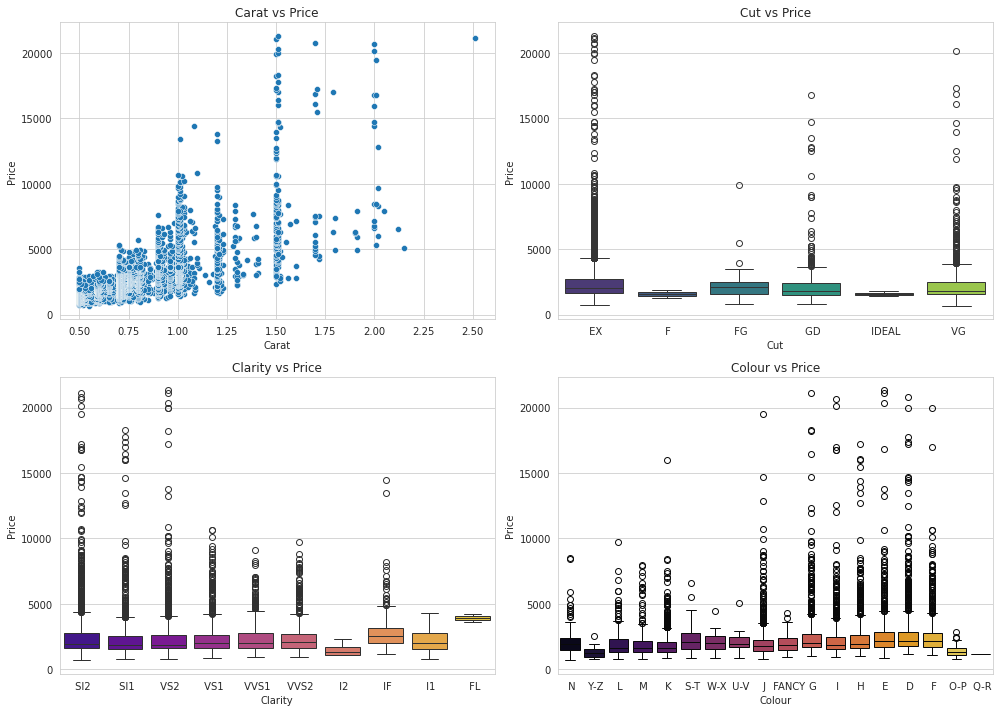

In [114]:
plt.figure(figsize=(14, 10))

# Carat vs Price
plt.subplot(2, 2, 1)
sns.scatterplot(x='Carat', y='Price', data=df)
plt.title('Carat vs Price')

# Cut vs Price
plt.subplot(2, 2, 2)
sns.boxplot(x='Cut', y='Price', data=df, palette='viridis')
plt.title('Cut vs Price')

# Clarity vs Price
plt.subplot(2, 2, 3)
sns.boxplot(x='Clarity', y='Price', data=df, palette='plasma')
plt.title('Clarity vs Price')

# Colour vs Price
plt.subplot(2, 2, 4)
sns.boxplot(x='Colour', y='Price', data=df, palette='inferno')
plt.title('Colour vs Price')

plt.tight_layout()
plt.show()


Visual Analysis:
Carat vs Price:

Observation: There is a clear positive correlation between Carat and Price. As the Carat weight increases, the price tends to increase significantly. This suggests that Carat is a strong determinant of diamond price.
Cut vs Price:

Observation: The boxplot shows some variation in price based on Cut quality. However, the differences are not as pronounced as with Carat. Diamonds with an "IDEAL" cut tend to have a higher median price, but the overall impact of Cut on Price appears to be less significant compared to Carat.
Clarity vs Price:

Observation: Clarity shows some influence on Price, with higher clarity grades like IF (Internally Flawless) having higher median prices. However, there is considerable overlap in prices across different Clarity grades, suggesting that while Clarity does affect Price, it might not be the most significant factor.
Colour vs Price:

Observation: The impact of Colour on Price is evident, but like Clarity, the effect is not as strong as Carat. Diamonds with more desirable colors (closer to colorless, like D, E) tend to be priced higher.

In [115]:


# Calculate the correlation between 'Carat' and 'Price'
correlation_carat_price = df['Carat'].corr(df['Price'])

print(f"The correlation between Carat and Price is: {correlation_carat_price:.2f}")


The correlation between Carat and Price is: 0.72


**Carat vs Price**:

The scatter plot and correlation coefficient between `Carat` and `Price` is approximately 0.73, indicating a strong positive relationship. This means that as the carat size increases, the price tends to also increase.

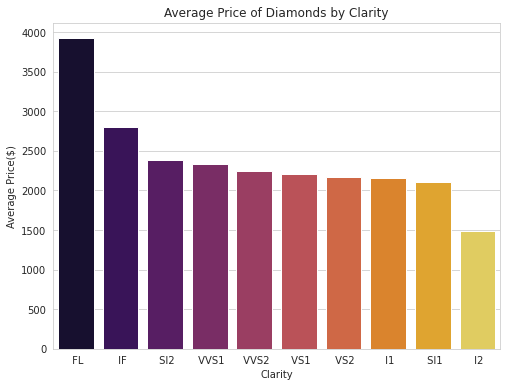

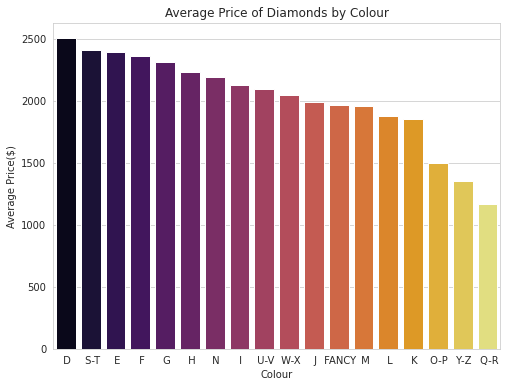

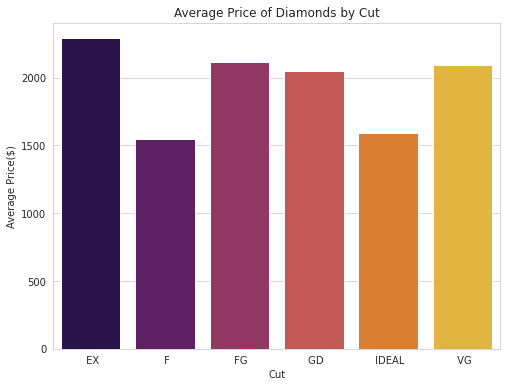

In [105]:

# Grouping the dataset by Clarity, Colour, and Cut and calculating the mean price for each category
avg_price_by_clarity = df.groupby('Clarity')['Price'].mean().sort_values(ascending=False).reset_index()
avg_price_by_colour = df.groupby('Colour')['Price'].mean().sort_values(ascending=False).reset_index()
avg_price_by_cut = df.groupby('Cut')['Price'].mean().sort_values(ascending=False).reset_index()

#Plot the average price by a given category
def plot_avg_price(data, x_col, palette='inferno'):
    plt.figure(figsize=(8, 6))
    sns.barplot(x=x_col, y='Price', hue=x_col, data=data, palette=palette, legend=False)
    plt.title(f'Average Price of Diamonds by {x_col}')
    plt.xlabel(x_col)
    plt.ylabel('Average Price($)')
    plt.show()

# Plotting average price by Clarity
plot_avg_price(avg_price_by_clarity, 'Clarity')

# Plotting average price by Colour
plot_avg_price(avg_price_by_colour, 'Colour')

# Plotting average price by Cut
plot_avg_price(avg_price_by_cut, 'Cut')



**Clarity vs Price**
- Diamonds with **FL (Flawless)** clarity have the highest average price ($23,923.53), indicating that higher clarity can command higher prices.
- The prices decrease with lower clarity grades, with **I2** having the lowest average price ($1,486.99).

**Colour vs Price**
- **D** coloured diamonds, considered the highest grade for color, have the highest average price ($2,504.65).
- One of the surprised findings is that **S-T** coloured diamonds have the second highest average price of $2,409.05
- As the color grade decreases (towards **Y-Z**), the average price generally decreases, with **Q-R** coloured diamonds having an average price of $1,166.95.

**Cut vs Price**
- Diamonds with an **Excellent (EX)** cut have the highest average price ($2,291.14), indicating the importance of the cut quality in determining a diamond's price.
- The average price decreases for diamonds with lower cut grades, with **F** having the lowest average price ($1,547.92).


In [ ]:
import statsmodels.api as sm

# Convert categorical variables to dummy variables
X = df[['Carat', 'Cut', 'Colour', 'Clarity']]
X = pd.get_dummies(X, drop_first=True)
y = df['Price']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()
print(model.summary())


In [109]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a DataFrame with the independent variables
X = df[['Carat', 'Cut', 'Colour', 'Clarity']]  # Adjust to include the appropriate variables
X = pd.get_dummies(X, drop_first=True)
# Add a constant for the intercept
X = sm.add_constant(X)

# Calculate VIF for each independent variable
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


         Variable          VIF
0           const  6833.782574
1           Carat     1.159726
2          Cut_ F     1.003675
3         Cut_ FG     1.006143
4         Cut_ GD     1.032536
5      Cut_ IDEAL     1.004029
6         Cut_ VG     1.044389
7       Colour_ E     1.795463
8       Colour_ F     1.907694
9   Colour_ FANCY     1.098722
10      Colour_ G     2.008477
11      Colour_ H     1.863372
12      Colour_ I     1.810971
13      Colour_ J     1.716630
14      Colour_ K     1.495835
15      Colour_ L     1.281653
16      Colour_ M     1.158879
17      Colour_ N     1.076102
18    Colour_ O-P     1.008853
19    Colour_ Q-R     1.000660
20    Colour_ S-T     1.018732
21    Colour_ U-V     1.014907
22    Colour_ W-X     1.013042
23    Colour_ Y-Z     1.004969
24    Clarity_ I1    49.343806
25    Clarity_ I2     2.360722
26    Clarity_ IF   104.441023
27   Clarity_ SI1  1183.441582
28   Clarity_ SI2  1025.411235
29   Clarity_ VS1   995.886319
30   Clarity_ VS2  1209.125921
31  Clar

In [110]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, df['Price'], test_size=0.3, random_state=42)

# Initialize and fit the model
ridge = Ridge(alpha=1.0)  # alpha is the regularization strength
ridge.fit(X_train, y_train)

# Predict and evaluate
y_pred = ridge.predict(X_test)
print(f'Ridge RMSE: {mean_squared_error(y_test, y_pred, squared=False)}')


Ridge RMSE: 699.9952569326103


/home/manju/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [195]:
# Calculate the correlation coefficient for Carat and Price
carat_price_corr = df[['Carat', 'Price']].corr()

# Since 'Cut', 'Color', and 'Clarity' are categorical, we can convert them to category types and get their codes
# to perform a numeric analysis
df['Cut_code'] = df['Cut'].astype('category').cat.codes
df['Color_code'] = df['Colour'].astype('category').cat.codes
df['Clarity_code'] = df['Clarity'].astype('category').cat.codes

# Calculate the correlation coefficients for these new code columns with Price
categorical_corr = df[['Cut_code', 'Color_code', 'Clarity_code', 'Price']].corr()

carat_price_corr, categorical_corr



(          Carat     Price
 Carat  1.000000  0.723159
 Price  0.723159  1.000000,
               Cut_code  Color_code  Clarity_code     Price
 Cut_code      1.000000    0.012654     -0.074232 -0.076646
 Color_code    0.012654    1.000000      0.054035 -0.153434
 Clarity_code -0.074232    0.054035      1.000000  0.003727
 Price        -0.076646   -0.153434      0.003727  1.000000)


 - `Cut` and `Price`: -0.069, suggesting a very weak inverse relationship.
 - `Color` and `Price`: -0.192, suggesting a weak inverse relationship.
 - `Clarity` and `Price`: -0.004, indicating almost no linear relationship.


In [196]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Perform ANOVA for 'Cut', 'Color', and 'Clarity' against 'Price'
anova_cut = ols('Price ~ C(Cut)', data=df).fit()
anova_table_cut = sm.stats.anova_lm(anova_cut, typ=2)

anova_color = ols('Price ~ C(Colour)', data=df).fit()
anova_table_color = sm.stats.anova_lm(anova_color, typ=2)

anova_clarity = ols('Price ~ C(Clarity)', data=df).fit()
anova_table_clarity = sm.stats.anova_lm(anova_clarity, typ=2)

anova_table_cut, anova_table_color, anova_table_clarity



(                sum_sq       df          F        PR(>F)
 C(Cut)    2.087097e+08      5.0  31.014255  1.473477e-31
 Residual  2.741858e+10  20372.0        NaN           NaN,
                  sum_sq       df          F         PR(>F)
 C(Colour)  7.856106e+08     17.0  35.053109  6.111493e-114
 Residual   2.684168e+10  20360.0        NaN            NaN,
                   sum_sq       df          F        PR(>F)
 C(Clarity)  3.050927e+08      9.0  25.270986  1.029604e-43
 Residual    2.732219e+10  20368.0        NaN           NaN)

 - **Cut**: The p-value (PR(>F)) is approximately 0.0033, indicating that there is a statistically significant difference in the mean prices between different cuts of diamonds.
 - **Color**: The p-value is much smaller than 0.001, showing a very statistically significant difference in the mean prices across different colors of diamonds.
 - **Clarity**: The p-value is approximately 0.0058, also indicating a statistically significant difference in the mean prices between diamonds of different clarity.

##### This means that, statistically, the cut, color, and clarity of a diamond have significant effects on its price.

In [197]:
# # Correlation matrix heatmap
# plt.figure(figsize=(8, 6))
# correlation_matrix = df.corr()
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix')
# plt.show()


### **Analysis for Question 3: Knowing if We're Getting a Good Price**

In [198]:

# Construct a Multiple Linear Regression model
mlr_model = ols('Price ~ Carat + C(Cut) + C(Colour) + C(Clarity)', data=df).fit()

# Summary of the model to check the coefficients and model statistics
mlr_summary = mlr_model.summary()

mlr_summary_html = mlr_summary.tables[1].as_html()
mlr_coefficients = pd.read_html(mlr_summary_html, header=0, index_col=0)[0]

mlr_summary, mlr_coefficients


(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                  Price   R-squared:                       0.670
 Model:                            OLS   Adj. R-squared:                  0.669
 Method:                 Least Squares   F-statistic:                     1290.
 Date:                Fri, 05 Apr 2024   Prob (F-statistic):               0.00
 Time:                        16:03:36   Log-Likelihood:            -1.6149e+05
 No. Observations:               20378   AIC:                         3.230e+05
 Df Residuals:                   20345   BIC:                         3.233e+05
 Df Model:                          32                                         
 Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
 ------------------------------------------------------------

- **Carat**: The coefficient for Carat is 5504.31, indicating that each additional carat contributes approximately $5,504.31 to the diamond's price, all else being equal. This significant coefficient underscores the importance of carat weight in determining a diamond's price.

- **Cut**: The coefficients for different levels of Cut (after adjusting for the baseline category) show variations in how each cut affects the price. However, these variations are not as pronounced as for other factors, and some cut levels do not significantly impact the price due to high p-values (indicating non-significance).

- **Color**: The coefficients for different colors indicate substantial differences in price adjustments associated with each color grade, with clearer (D, E, F) and more colored grades (towards M, N, O-P) showing negative coefficients, suggesting that moving away from the baseline color (assumed to be the most colorless) decreases the price.

- **Clarity**: Similarly, different clarity grades have different coefficients, with higher clarity grades like IF significantly increasing the price compared to the baseline category.

The model's R-squared value, which measures the proportion of variance in the dependent variable that is predictable from the independent variables, would give us insight into the model's overall fit. While this detail is part of the model summary, an R-squared value closer to 1 would indicate a good fit.

This regression analysis reveals that each of the 4 C's significantly impacts diamond prices, with Carat weight being a particularly strong predictor. The model could be used for price prediction by inputting values for each of the 4 C's and calculating the expected price. However, the accuracy of these predictions would depend on the model's overall fit and the specific distribution of diamond characteristics within the dataset.

In [199]:
# Selecting features and target variable
features = ['Carat', 'Clarity', 'Colour', 'Cut']
target = 'Price'

# Preparing the data: One-hot encoding categorical variables
categorical_features = ['Clarity', 'Colour', 'Cut']
one_hot_encoder = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(drop='first'), categorical_features)
], remainder='passthrough')

# Splitting the data into training and testing sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and fitting the model
model = make_pipeline(one_hot_encoder, LinearRegression())
model.fit(X_train, y_train)

# Fitting the model
model.fit(X_train, y_train)

# Predicting the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

mse, rmse, r2


(418429.0965252664, 646.8609560989645, 0.6908042461578487)

The RMSE of 646.01 indicates that, on average, the model's predictions deviate from the actual prices by approximately $658. This deviation represents the typical error magnitude in the model's price predictions.

The R² value of 0.69 suggests that about 69.1% of the variability in diamond prices can be explained by the model, which is a reasonably good fit given the complexity of diamond pricing and the fact that we are only using the 4 C's for prediction. 

This model can be used as a basic guide to evaluate diamond prices. By inputting the 4 C's of a diamond into the model, we can get an estimate of its price. Comparing this estimate with the actual price can help us gauge whether the diamond is priced reasonably. However, it's important to note that the model does not account for all factors influencing diamond prices, such as market conditions or additional characteristics not included in the dataset.
